In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

#Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS BOOTCAMP 27B/FINAL PROJECT/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


- Loan id : identifikasi unik untuk yang mengajukan pinjaman
- No of dependents : jumlah tanggungan
- Education :  Menunjukkan status lulus/tidak
- Self-employed : Menunjukkan status wiraswasta
- Income annum : Total pendapatan tahunan
- Loan Amount : Total pengajuan pinjaman
- Loan term : Jangka waktu pinjaman
- Cibil score : Score kredit menunjukkan layak/tidak dari lembaga pelaporan kredit di India
- residential_assets_value : Nilai aset tempat tinggal
- Commercial asset value : Aset bisnis
- Luxury asset value : Aset barang mewah
- Bank assset value : Aset bank yang tersedia intuk digunakan
- Loan status : Status pinjaman

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
numerical_col = ['loan_id',' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']
categorical_col = [' education',' self_employed',' loan_status']

In [ ]:
data[categorical_col].describe()

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


- jumlah unique kolom pada education 2 dan Graduate merupakan value paling banyak
- jumlah unique kolom pada sel_employed 2 dengan value Yes yang sering muncul
- jumlah unique kolom pada loan_status 2 dengan value Approved yang sering muncul

In [ ]:
data[numerical_col].describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


- Rata - rata dependent adalah 2,4
- Rata - rata income_annum adalah 5.059.124 rupee
- Rata - rata loan_amount adalah 15.133.450 rupee
- Rata - rata loan_term adalah 10,9
- Rata - rata cibil_score adalah 599,6
- Rata - rata residential_assets_value adalah 7.472.617 rupee
- Rata - rata commercial_assets_value adalah 4.973.155 rupee
- Rata - rata luxury_assets_value adalah 15.126.310 rupee
- Rata - rata bank_asset_value adalah 4.976.692 rupee

#EDA


## Univariate Analysis

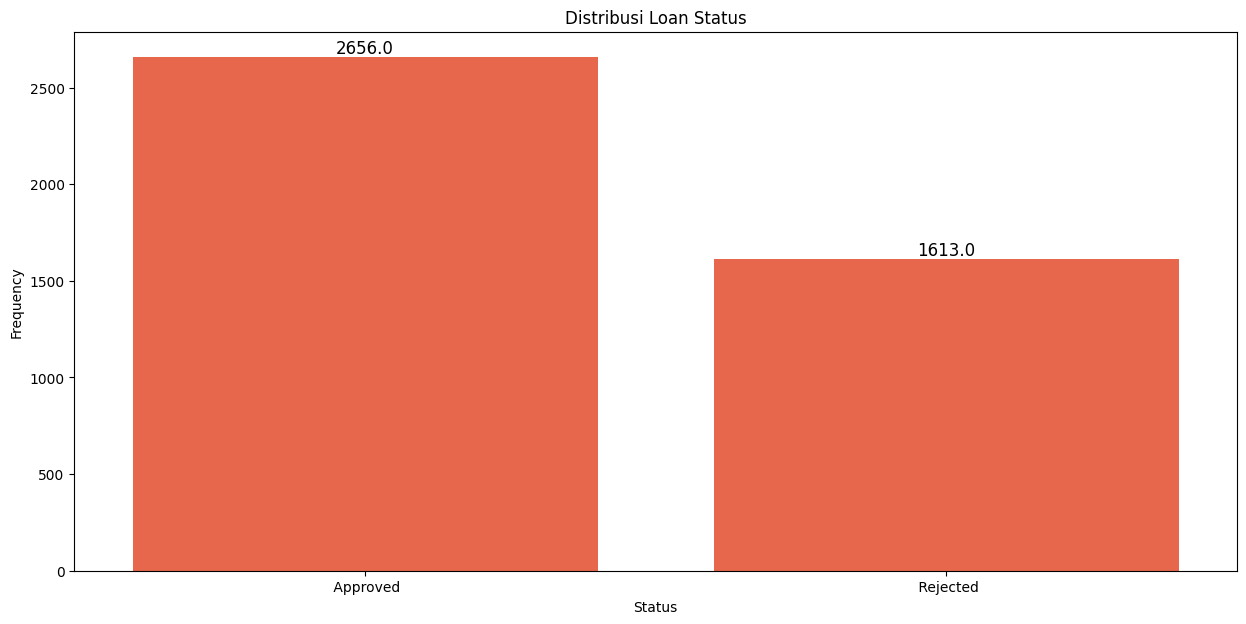

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x = ' loan_status', data = data,
              order = data[' loan_status'].value_counts().iloc[:].index,
             color='#ff5733')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title("Distribusi Loan Status")
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.groupby(' self_employed')[' loan_status'].value_counts()

self_employed   loan_status
No              Approved        1318
                Rejected         801
Yes             Approved        1338
                Rejected         812
Name: count, dtype: int64

<ipython-input-13-ca66f193f878>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=' loan_status', palette='Set2', ax=ax[0])


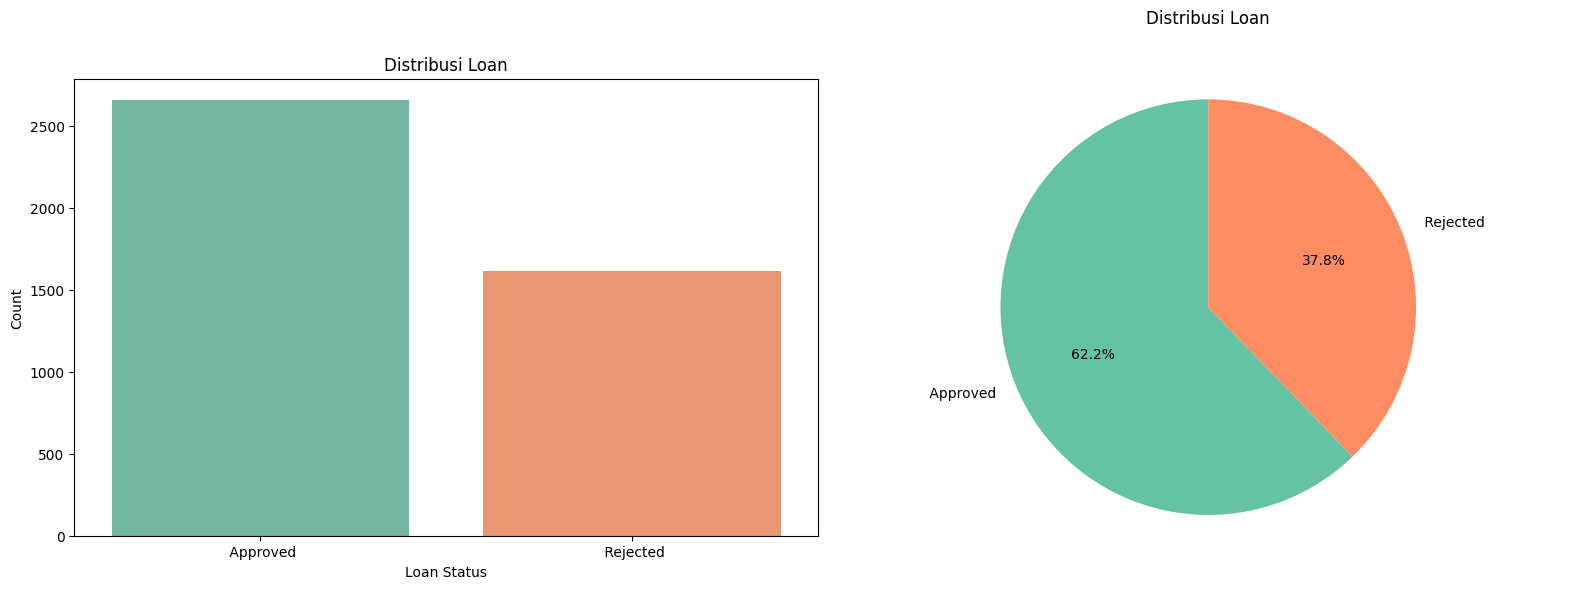

In [ ]:
outcome_type_counts = data[' loan_status'].value_counts()


colors = sns.color_palette('Set2', len(outcome_type_counts))


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Countplot (Bar Chart)
ax[0].set_title('Distribusi Loan')
sns.countplot(data=data, x=' loan_status', palette='Set2', ax=ax[0])
ax[0].set_xlabel('Loan Status')
ax[0].set_ylabel('Count')

# Plot kedua: Pie Chart
ax[1].set_title('Distribusi Loan', pad=40)
ax[1].pie(outcome_type_counts, labels=outcome_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].axis('equal')


plt.tight_layout()


plt.show()

<ipython-input-14-62e77bdbca7f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=' education', palette='Set2', ax=ax[0])


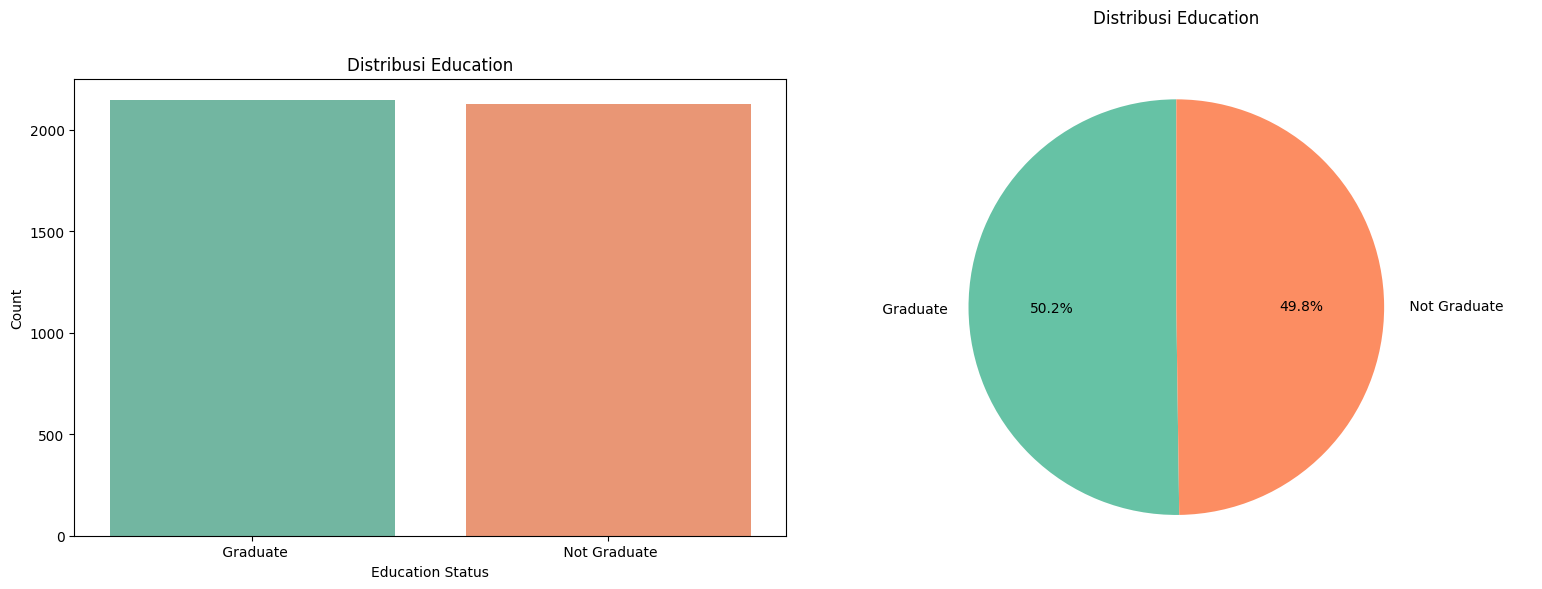

In [ ]:
outcome_type_counts = data[' education'].value_counts()


colors = sns.color_palette('Set2', len(outcome_type_counts))


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Countplot (Bar Chart)
ax[0].set_title('Distribusi Education')
sns.countplot(data=data, x=' education', palette='Set2', ax=ax[0])
ax[0].set_xlabel('Education Status')
ax[0].set_ylabel('Count')

# Plot kedua: Pie Chart
ax[1].set_title('Distribusi Education', pad=40)
ax[1].pie(outcome_type_counts, labels=outcome_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].axis('equal')


plt.tight_layout()


plt.show()

<ipython-input-15-6f3b66cd73e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=' self_employed', palette='Set2', ax=ax[0])


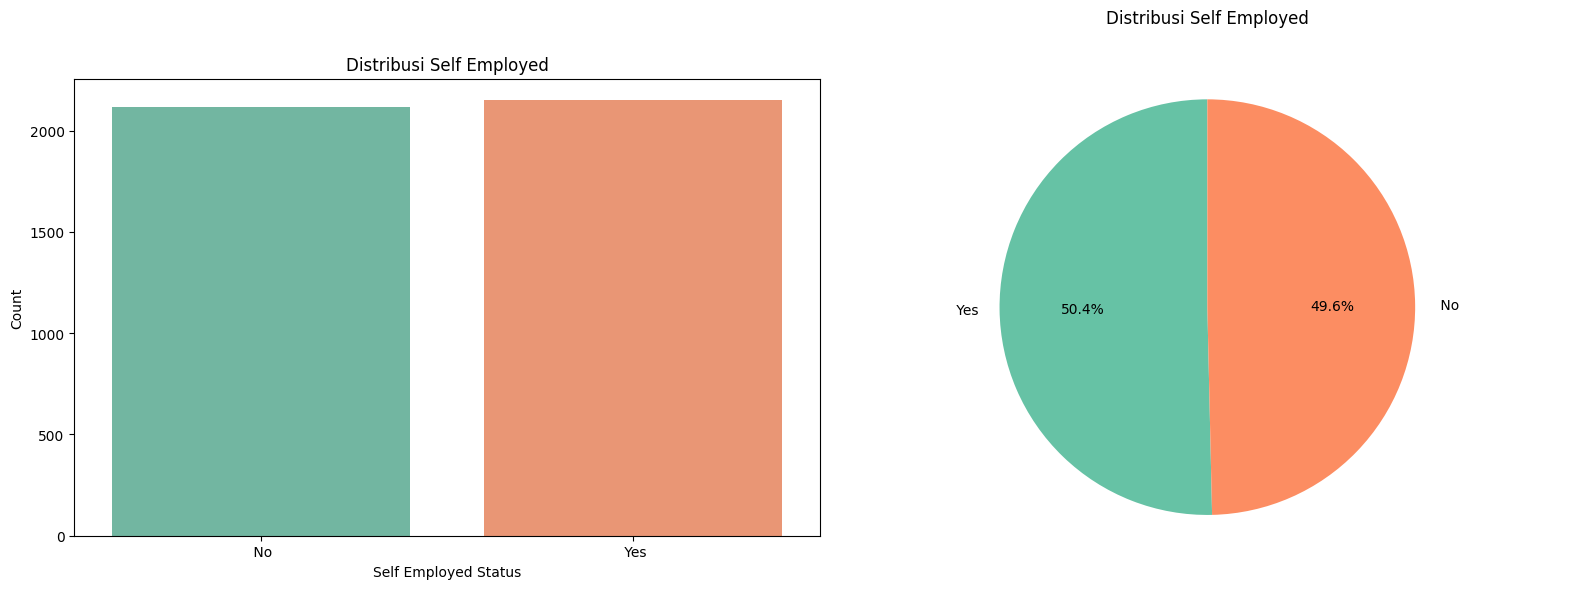

In [ ]:
outcome_type_counts = data[' self_employed'].value_counts()


colors = sns.color_palette('Set2', len(outcome_type_counts))


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Countplot (Bar Chart)
ax[0].set_title('Distribusi Self Employed')
sns.countplot(data=data, x=' self_employed', palette='Set2', ax=ax[0])
ax[0].set_xlabel('Self Employed Status')
ax[0].set_ylabel('Count')

# Plot kedua: Pie Chart
ax[1].set_title('Distribusi Self Employed', pad=40)
ax[1].pie(outcome_type_counts, labels=outcome_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].axis('equal')


plt.tight_layout()


plt.show()

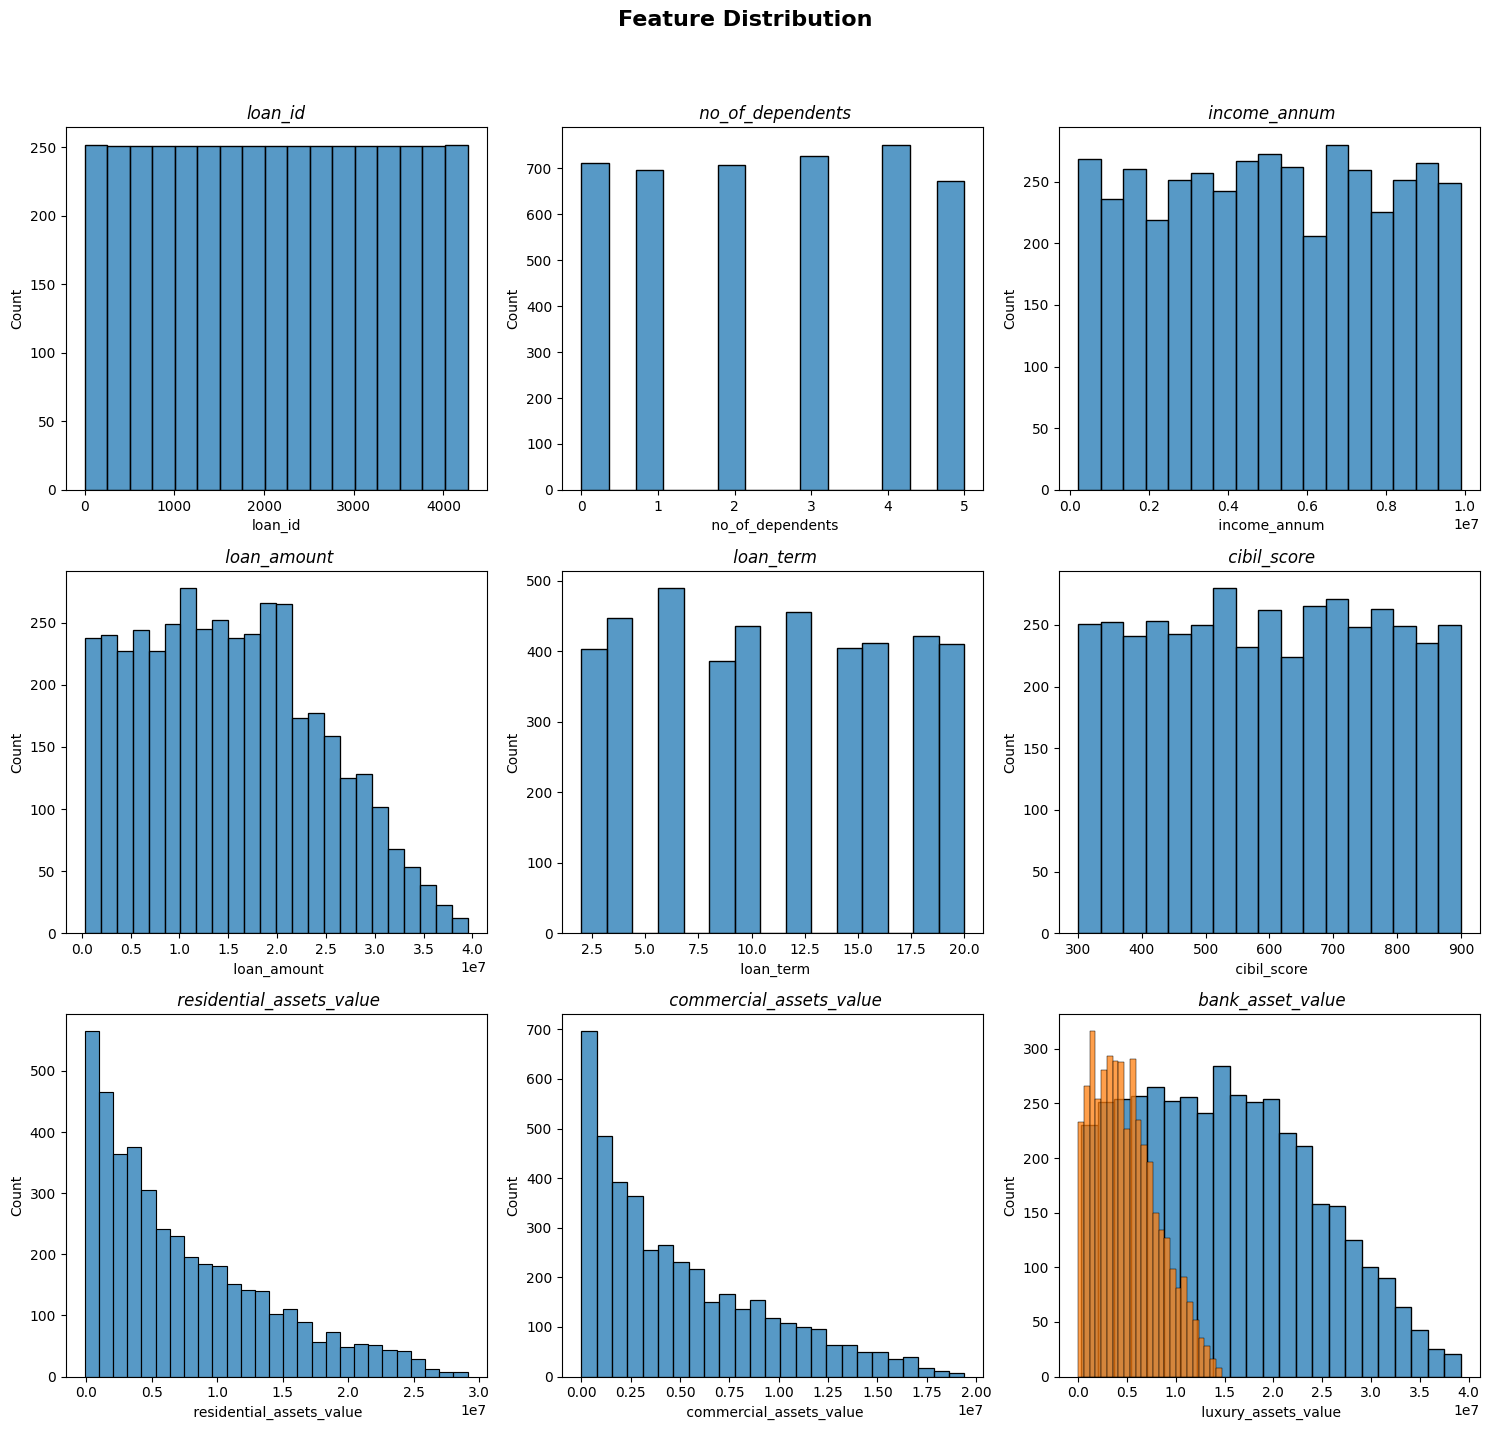

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot masing-masing fitur
sns.histplot(data['loan_id'], kde=False, ax=axes[0, 0]).set_title('loan_id', fontsize=12, fontstyle='italic')
sns.histplot(data[' no_of_dependents'], kde=False, ax=axes[0, 1]).set_title(' no_of_dependents', fontsize=12, fontstyle='italic')
sns.histplot(data[' income_annum'], kde=False, ax=axes[0, 2]).set_title(' income_annum', fontsize=12, fontstyle='italic')
sns.histplot(data[' loan_amount'], kde=False, ax=axes[1, 0]).set_title(' loan_amount', fontsize=12, fontstyle='italic')
sns.histplot(data[' loan_term'], kde=False, ax=axes[1, 1]).set_title(' loan_term', fontsize=12, fontstyle='italic')
sns.histplot(data[' cibil_score'], kde=False, ax=axes[1, 2]).set_title(' cibil_score', fontsize=12, fontstyle='italic')
sns.histplot(data[' residential_assets_value'], kde=False, ax=axes[2, 0]).set_title(' residential_assets_value', fontsize=12, fontstyle='italic')
sns.histplot(data[' commercial_assets_value'], kde=False, ax=axes[2, 1]).set_title(' commercial_assets_value', fontsize=12, fontstyle='italic')
sns.histplot(data[' luxury_assets_value'], kde=False, ax=axes[2, 2]).set_title(' luxury_assets_value', fontsize=12, fontstyle='italic')
sns.histplot(data[' bank_asset_value'], kde=False, ax=axes[2, 2]).set_title(' bank_asset_value', fontsize=12, fontstyle='italic')

# Menambahkan title untuk keseluruhan plot
plt.suptitle('Feature Distribution', fontsize=16, fontweight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


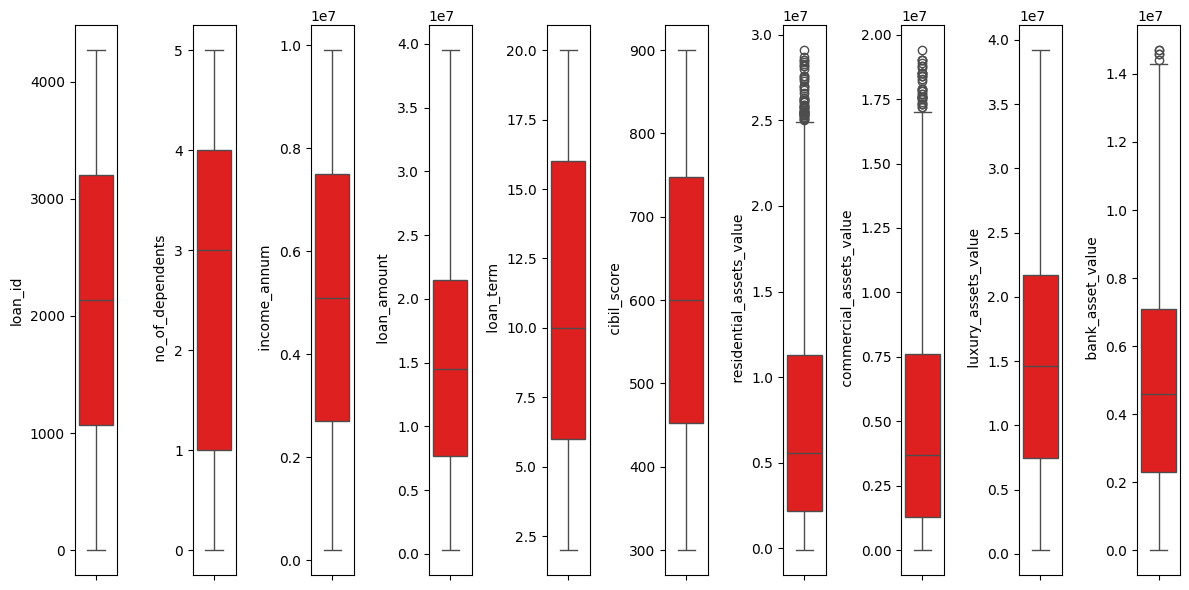

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical_col
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

## Multivariate Analysis

In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<Axes: xlabel=' education', ylabel='count'>

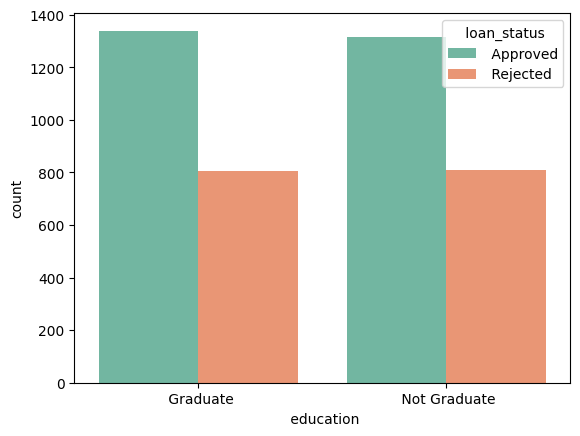

In [ ]:
sns.countplot(data=data,
            x=' education',
            hue=' loan_status',
            palette='Set2'
            )

Dengan status graduate lebih memungkinkan untuk menerima pinjaman

<Axes: xlabel=' self_employed', ylabel='count'>

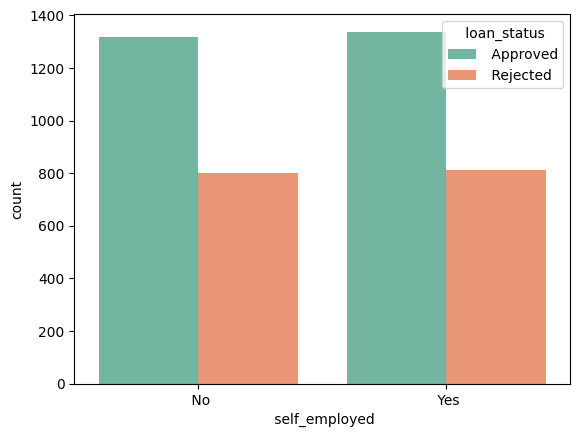

In [ ]:
sns.countplot(data=data,
            x=' self_employed',
            hue=' loan_status',
            palette='Set2'
            )

Dengan status self_employed lebih memungkinkan untuk menerima pinjaman

#Feature Engineering


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
#drop kolom loan_id
data.drop(columns = ['loan_id'], inplace=True)

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [ ]:
data[' education'].value_counts()

,count
education,
Graduate,2144
Not Graduate,2125


In [ ]:
#Label dengan cat codes
data[' education'] = data[' education'].astype('category')
data['education'] = data[' education'].cat.codes
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1


In [ ]:
#graduate = 0
#not graduate 1

In [ ]:
data = data.drop(' education', axis=1)
data.head()

,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education
0,2,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0
1,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
2,3,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
3,3,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
4,5,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1


In [ ]:
data[' self_employed'].value_counts()

,count
self_employed,
Yes,2150
No,2119


In [ ]:
data[' self_employed'] = data[' self_employed'].astype('category')
data['self_employed'] = data[' self_employed'].cat.codes
data.head()

,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education,self_employed
0,2,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0
1,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1
2,3,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0
3,3,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0
4,5,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1


In [ ]:
#yes = 1
#no = 0

In [ ]:
data = data.drop(' self_employed', axis=1)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education,self_employed
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1


In [ ]:
data[' loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [ ]:
data[' loan_status'] = data[' loan_status'].astype('category')
data['loan_status'] = data[' loan_status'].cat.codes
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1,1


In [ ]:
#approved = 0
#rejected = 1

In [ ]:
data = data.drop(' loan_status', axis=1)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    income_annum              4269 non-null   int64
 2    loan_amount               4269 non-null   int64
 3    loan_term                 4269 non-null   int64
 4    cibil_score               4269 non-null   int64
 5    residential_assets_value  4269 non-null   int64
 6    commercial_assets_value   4269 non-null   int64
 7    luxury_assets_value       4269 non-null   int64
 8    bank_asset_value          4269 non-null   int64
 9   education                  4269 non-null   int8 
 10  self_employed              4269 non-null   int8 
 11  loan_status                4269 non-null   int8 
dtypes: int64(9), int8(3)
memory usage: 312.8 KB


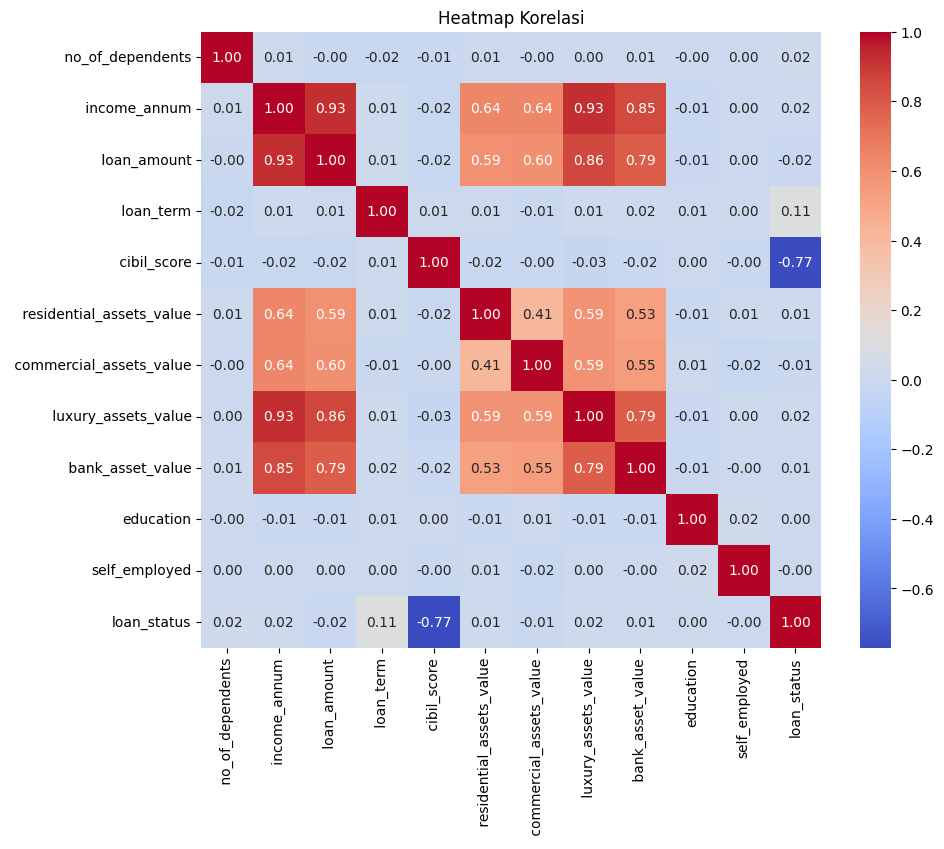

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
#drop redundant features
data.drop(columns = [' cibil_score'], inplace=True)

In [ ]:
data.drop(columns = [' income_annum'], inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(data)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,12.133250
1,no_of_dependents,1.001425
2,loan_amount,4.705207
3,loan_term,1.014093
4,residential_assets_value,1.616759
5,commercial_assets_value,1.643733
6,luxury_assets_value,4.610690
7,bank_asset_value,3.048186
8,education,1.001180
9,self_employed,1.001310


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    loan_amount               4269 non-null   int64
 2    loan_term                 4269 non-null   int64
 3    residential_assets_value  4269 non-null   int64
 4    commercial_assets_value   4269 non-null   int64
 5    luxury_assets_value       4269 non-null   int64
 6    bank_asset_value          4269 non-null   int64
 7   education                  4269 non-null   int8 
 8   self_employed              4269 non-null   int8 
 9   loan_status                4269 non-null   int8 
dtypes: int64(7), int8(3)
memory usage: 246.1 KB


#Train-test split



In [ ]:
X = data.drop(['loan_status'], axis = 1)
y = data['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                stratify = y,
                                                random_state = 42)

## Imbalance Handling

In [ ]:
from imblearn import over_sampling

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
data_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
data_smote.head(3)

,no_of_dependents,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,0,16400000,2,3300000,3500000,15000000,5800000,0,0,0
1,3,14200000,12,3200000,200000,14000000,3000000,1,1,1
2,1,7600000,2,800000,700000,10100000,2100000,0,0,1


In [ ]:
data_smote['loan_status'].value_counts()

,count
loan_status,
0,1859
1,1859


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_over_smote,
                                                y_over_smote,
                                                test_size = 0.3,
                                                stratify = y_over_smote,
                                                random_state = 42)

In [ ]:
X_train.shape

(2602, 9)

In [ ]:
X_test.shape

(1116, 9)

In [ ]:
y_train.value_counts()

,count
loan_status,
1,1301
0,1301


In [ ]:
y_test.value_counts()

,count
loan_status,
1,558
0,558


#Modelling and evaluation

In [ ]:
#Logistic Regression
#define logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression() #model

#fit model to training data
logistic_reg.fit(X_train, y_train) #fit

LogisticRegression()

In [ ]:
y_pred_reg = logistic_reg.predict(X_test)
y_pred_reg

array([0, 1, 1, ..., 1, 0, 1], dtype=int8)

In [ ]:
from sklearn.metrics import accuracy_score
print('Akurasi',accuracy_score(y_test, y_pred_reg))

Akurasi 0.5053763440860215


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#define Decision tree model
dt_clf = DecisionTreeClassifier(random_state=42)

#fit model to training data
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_clf.predict(X_test)
y_pred_dt

array([1, 0, 1, ..., 1, 1, 1], dtype=int8)

In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))

Akurasi 0.6155913978494624


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 42,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest_clf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_rf))

Akurasi 0.6514336917562724


#Model Evaluation

In [ ]:
#logistic regression training evaluation
log_train = logistic_reg.predict(X_train)
log_train_proba = logistic_reg.predict_proba(X_train)
#decision tree training evaluation
dt_train = dt_clf.predict(X_train)
dt_train_proba = dt_clf.predict_proba(X_train)
# random forest training evaluation
rf_train = random_forest_clf.predict(X_train)
rf_train_proba = random_forest_clf.predict_proba(X_train)


In [ ]:
#logistic regression prediction
log_pred = logistic_reg.predict(X_test)
log_pred_proba = logistic_reg.predict_proba(X_test)

#decision tree prediction
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

# random forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
pd.DataFrame(metrics.classification_report(y_train, log_train , output_dict=True)).T

,precision,recall,f1-score,support
0,0.529827,0.518832,0.524272,1301.000000
1,0.528614,0.539585,0.534043,1301.000000
accuracy,0.529208,0.529208,0.529208,0.529208
macro avg,0.529221,0.529208,0.529158,2602.000000
weighted avg,0.529221,0.529208,0.529158,2602.000000


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, log_train))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1301
           1       0.53      0.54      0.53      1301

    accuracy                           0.53      2602
   macro avg       0.53      0.53      0.53      2602
weighted avg       0.53      0.53      0.53      2602



In [ ]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       558
           1       0.51      0.53      0.52       558

    accuracy                           0.51      1116
   macro avg       0.51      0.51      0.51      1116
weighted avg       0.51      0.51      0.51      1116



In [ ]:
print(classification_report(y_train, dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1301
           1       1.00      1.00      1.00      1301

    accuracy                           1.00      2602
   macro avg       1.00      1.00      1.00      2602
weighted avg       1.00      1.00      1.00      2602



In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       558
           1       0.61      0.66      0.63       558

    accuracy                           0.62      1116
   macro avg       0.62      0.62      0.61      1116
weighted avg       0.62      0.62      0.61      1116



In [ ]:
print(classification_report(y_train, rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1301
           1       1.00      1.00      1.00      1301

    accuracy                           1.00      2602
   macro avg       1.00      1.00      1.00      2602
weighted avg       1.00      1.00      1.00      2602



In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       558
           1       0.64      0.68      0.66       558

    accuracy                           0.65      1116
   macro avg       0.65      0.65      0.65      1116
weighted avg       0.65      0.65      0.65      1116



In [ ]:
#0 approved
# 1 rejected

#Model terbaik random forest

#Confusion Matrix

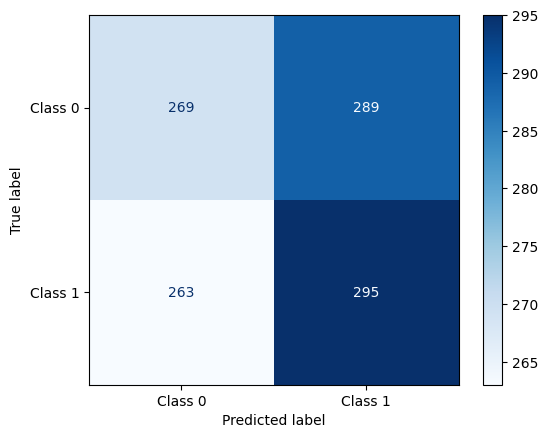

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, log_pred)

# Plot confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Menampilkan plot
plt.show()

In [ ]:
#true positives :class 0(approved) were correctly identified by the algorithm
#true negatives :class 1(rejected) were correctly identified by the algorithm

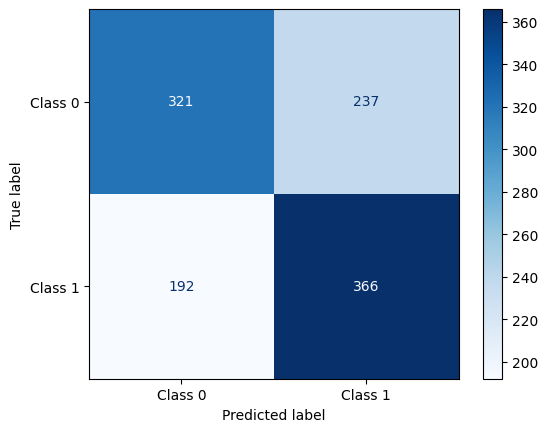

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Plot confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Menampilkan plot
plt.show()

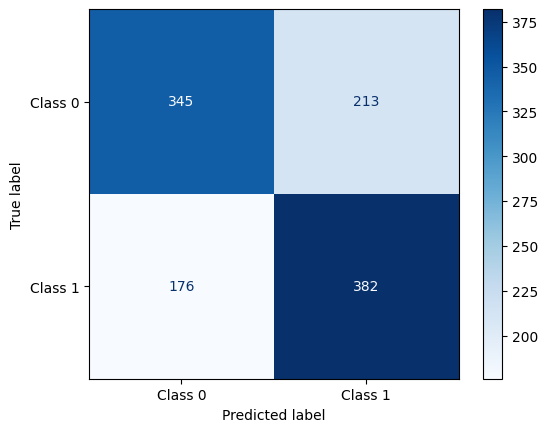

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Menampilkan plot
plt.show()

#Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty' : [None, '11', '12']
}

# the tuning
logistic_reg_gridcv = GridSearchCV(logistic_reg, parameters, cv=5,
                                scoring='f1')
logistic_reg_gridcv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': [None, '11', '12']},
             scoring='f1')

In [ ]:
pd.DataFrame(logistic_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088925,0.038523,0.013437,0.002762,0.001,None,"{'C': 0.001, 'penalty': None}",0.580756,0.536673,0.581197,0.495935,0.620232,0.562958,0.042691,1
1,0.004882,0.002758,0.000000,0.000000,0.001,11,"{'C': 0.001, 'penalty': '11'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,0.002607,0.000320,0.000000,0.000000,0.001,12,"{'C': 0.001, 'penalty': '12'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.058078,0.023338,0.010619,0.000663,0.010,None,"{'C': 0.01, 'penalty': None}",0.580756,0.536673,0.581197,0.495935,0.620232,0.562958,0.042691,1
4,0.002830,0.000157,0.000000,0.000000,0.010,11,"{'C': 0.01, 'penalty': '11'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.002659,0.000049,0.000000,0.000000,0.010,12,"{'C': 0.01, 'penalty': '12'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.062011,0.025710,0.013944,0.003456,0.100,None,"{'C': 0.1, 'penalty': None}",0.580756,0.536673,0.581197,0.495935,0.620232,0.562958,0.042691,1
7,0.004266,0.000659,0.000000,0.000000,0.100,11,"{'C': 0.1, 'penalty': '11'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
8,0.003670,0.000238,0.000000,0.000000,0.100,12,"{'C': 0.1, 'penalty': '12'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.053310,0.017944,0.021001,0.006251,1.000,None,"{'C': 1, 'penalty': None}",0.580756,0.536673,0.581197,0.495935,0.620232,0.562958,0.042691,1


In [ ]:
cv_result = pd.DataFrame(logistic_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': None}",0.562958,1
3,"{'C': 0.01, 'penalty': None}",0.562958,1
6,"{'C': 0.1, 'penalty': None}",0.562958,1
9,"{'C': 1, 'penalty': None}",0.562958,1
12,"{'C': 10, 'penalty': None}",0.562958,1
1,"{'C': 0.001, 'penalty': '11'}",NaN,6
2,"{'C': 0.001, 'penalty': '12'}",NaN,6
4,"{'C': 0.01, 'penalty': '11'}",NaN,6
5,"{'C': 0.01, 'penalty': '12'}",NaN,6
7,"{'C': 0.1, 'penalty': '11'}",NaN,6


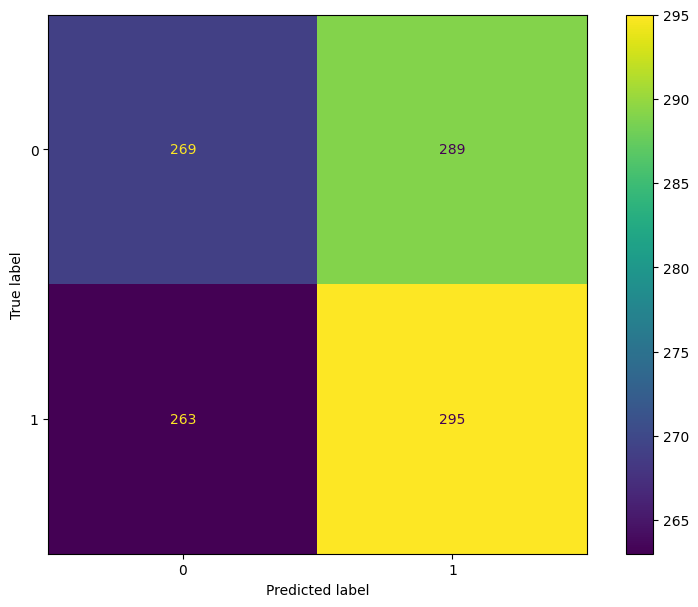

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
log_pred = logistic_reg_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, log_pred, labels=logistic_reg_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logistic_reg_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
log_pred = logistic_reg_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       558
           1       0.51      0.53      0.52       558

    accuracy                           0.51      1116
   macro avg       0.51      0.51      0.51      1116
weighted avg       0.51      0.51      0.51      1116



In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':(1,2,3,4,5),
    'min_samples_split': (2, 5, 10),  # Add other relevant parameters for DecisionTreeClassifier
    'min_samples_leaf': (1, 2, 4)
}

# note: we use f1
dt_clf_gridcv = GridSearchCV(dt_clf, parameters, cv=5, scoring='f1')
dt_clf_gridcv.fit(X_train, y_train)

CPU times: user 5.49 s, sys: 108 ms, total: 5.6 s
Wall time: 10.1 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'min_samples_leaf': (1, 2, 4),
                         'min_samples_split': (2, 5, 10)},
             scoring='f1')

In [ ]:
# the results
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.687774,1
1,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.687774,1
2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.687774,1
3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.687774,1
4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.687774,1
5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.687774,1
6,"{'max_depth': 1, 'min_samples_leaf': 4, 'min_s...",0.687774,1
7,"{'max_depth': 1, 'min_samples_leaf': 4, 'min_s...",0.687774,1
8,"{'max_depth': 1, 'min_samples_leaf': 4, 'min_s...",0.687774,1
41,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.627891,10


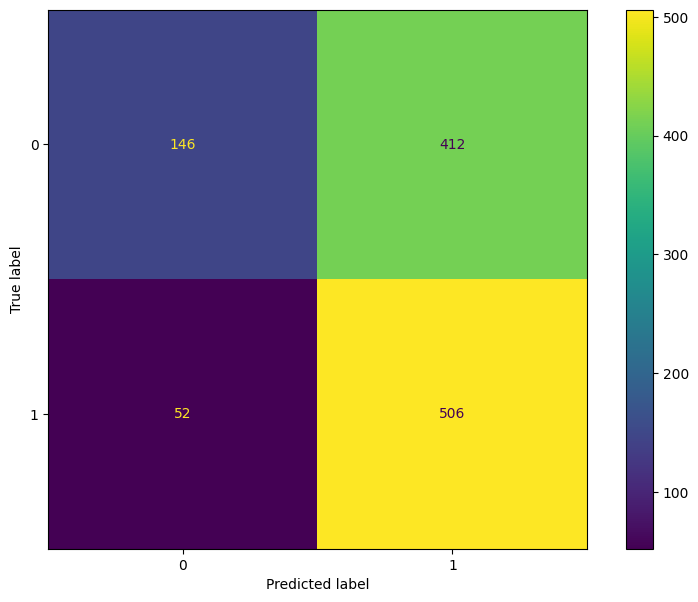

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
dt_pred = dt_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, dt_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
dt_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.26      0.39       558
           1       0.55      0.91      0.69       558

    accuracy                           0.58      1116
   macro avg       0.64      0.58      0.54      1116
weighted avg       0.64      0.58      0.54      1116



In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use f1
random_forest_clf_gridcv = GridSearchCV(random_forest_clf, parameters, cv=5, scoring='f1')
random_forest_clf_gridcv.fit(X_train, y_train)


CPU times: user 22.6 s, sys: 104 ms, total: 22.7 s
Wall time: 33.9 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='f1')

In [ ]:
# the results
cv_result = pd.DataFrame(random_forest_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'max_depth': 1, 'n_estimators': 50}",0.680506,1
1,"{'max_depth': 1, 'n_estimators': 20}",0.677938,2
5,"{'max_depth': 2, 'n_estimators': 10}",0.676025,3
6,"{'max_depth': 2, 'n_estimators': 20}",0.675736,4
2,"{'max_depth': 1, 'n_estimators': 30}",0.674549,5
3,"{'max_depth': 1, 'n_estimators': 40}",0.674056,6
14,"{'max_depth': 3, 'n_estimators': 50}",0.672062,7
8,"{'max_depth': 2, 'n_estimators': 40}",0.670930,8
9,"{'max_depth': 2, 'n_estimators': 50}",0.670324,9
13,"{'max_depth': 3, 'n_estimators': 40}",0.668679,10


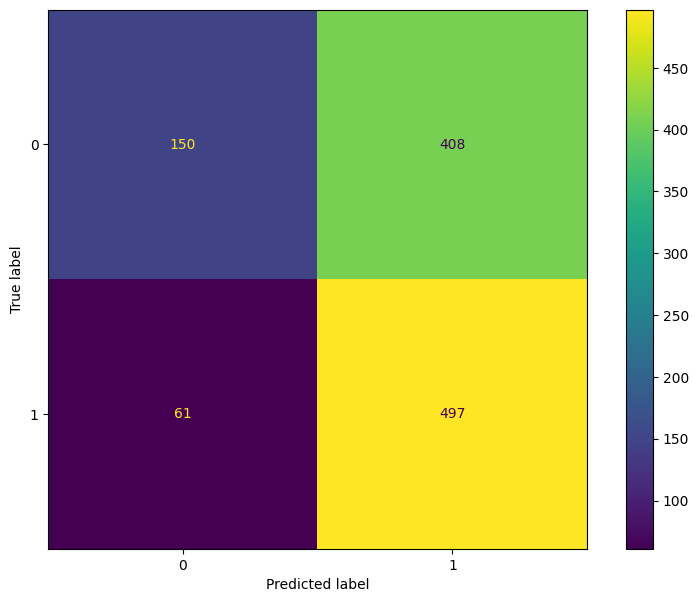

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
rf_pred = random_forest_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, rf_pred, labels=random_forest_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=random_forest_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
rf_pred = random_forest_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.71      0.27      0.39       558
           1       0.55      0.89      0.68       558

    accuracy                           0.58      1116
   macro avg       0.63      0.58      0.53      1116
weighted avg       0.63      0.58      0.53      1116



#Feature Importance

In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=c26ef6e0117c9310271deb706f506ee4f045bf8f5b71b50cfa18bb78be69f471
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [ ]:
import dalex as dx
loan_dt_exp = dx.Explainer(dt_clf, X_train, y_train, label="Decision Tree Model")

Preparation of a new explainer is initiated

  -> data              : 2602 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2602 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Decision Tree Model
  -> predict function  : <function yhat_proba_default at 0x789f4b09dc60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 0.0, max = 0.0
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
loan_dt_exp.model_parts().plot()

top 5 feature importance dari model decision tree:
1. loan amount
2. loan term
3. commercial asset value
4. luxury asset value
5. bank asset value

In [ ]:
loan_dt_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.    2.18  2.36 ... 19.64 19.82 20.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  67%|██████▋   | 6/9 [00:00<00:00, 45.26it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and 

In [ ]:
import shap
explainer = shap.Explainer(dt_clf, X_train)
shap_values = explainer(X_test)

Variable Importance Plot - Global Interpretation for Class 0


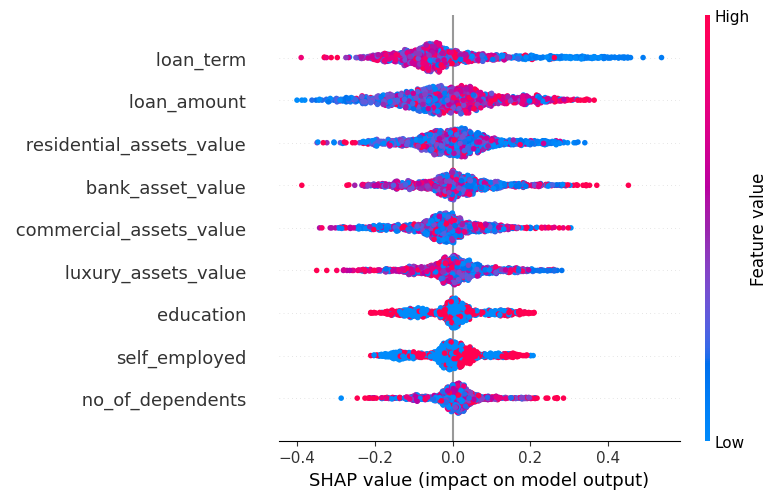

In [ ]:
# Access the SHAP values for the desired class (e.g., class 0 or 1)
shap_values_class_0 = shap_values[:,:,0]  # SHAP values for class 0
# or
#shap_values_class_1 = shap_values[:,:,1]  # SHAP values for class 1

print("Variable Importance Plot - Global Interpretation for Class 0")
shap.summary_plot(shap_values_class_0, X_test)

Variable Importance Plot - Global Interpretation for Class 1


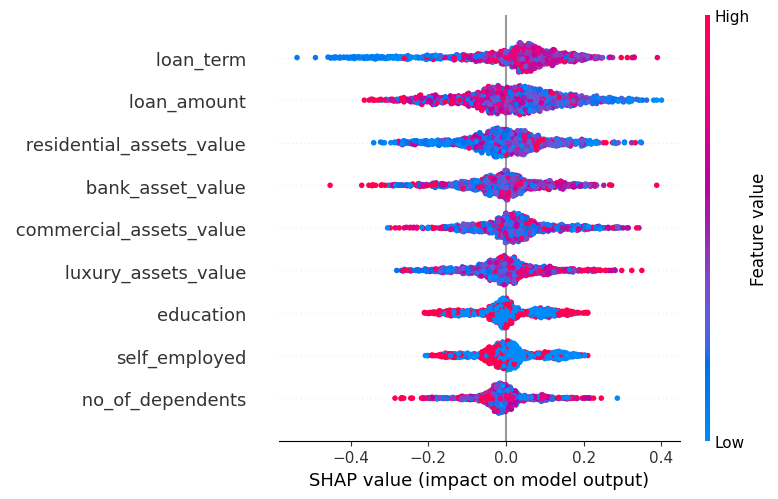

In [ ]:
#shap_values_class_0 = shap_values[:,:,0]  # SHAP values for class 0
# or
shap_values_class_1 = shap_values[:,:,1]  # SHAP values for class 1

print("Variable Importance Plot - Global Interpretation for Class 1")
shap.summary_plot(shap_values_class_1, X_test)

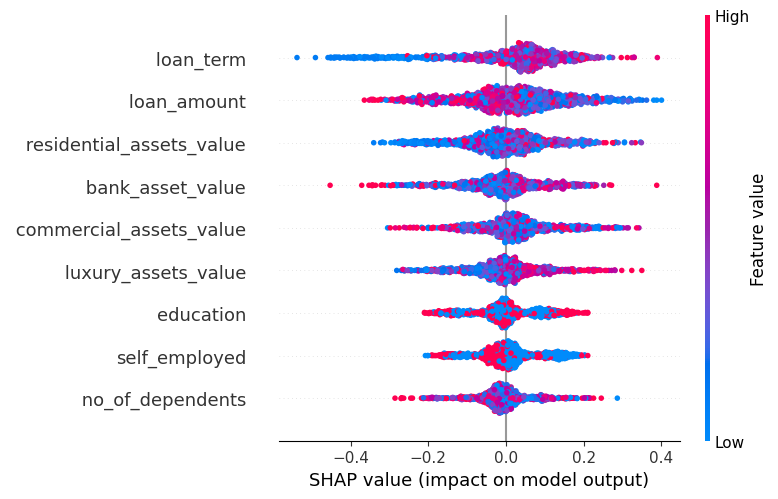

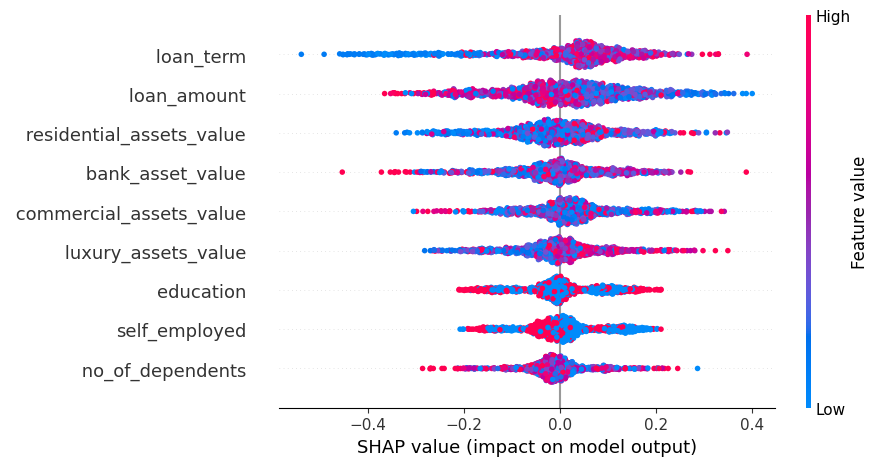

In [ ]:
# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values[:,:,1], X_test) # Select the SHAP values for a specific class (e.g., class 1)

# Beeswarm Plot (Distribusi SHAP Values)
shap.plots.beeswarm(shap_values[:,:,1]) # Select the SHAP values for a specific class (e.g., class 1)

# Force Plot (Prediksi Individual)
shap.plots.force(shap_values[0,:,1])# Select the SHAP values for a specific class (e.g., class 1)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0cdc8a51352f14662525cf51591cc158c6cc7aa3655a9619d28aeab411e58200
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Approved', 'Rejected']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

In [ ]:
# Import necessary libraries
import lime
from lime.lime_tabular import LimeTabularExplainer



# Create the explainer object
explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification",
)

# Choose an instance from your dataset (e.g., the first instance)
instance_idx = 0
instance = X_test.iloc[instance_idx].values

# Generate the explanation for the chosen instance
explanation = explainer.explain_instance(
    instance,
    dt_clf.predict_proba,  # Use your model's prediction probability function
    num_features=10,  # Number of features to include in the explanation
)

# Print the explanation
print(explanation.as_list())

# Optionally, you can also visualize the explanation
explanation.show_in_notebook(show_table=True)

[(' luxury_assets_value > 21500000.00', 0.08952359051040455), (' loan_amount > 21200000.00', -0.05067353734755261), (' no_of_dependents <= 1.00', 0.03279752891110667), (' bank_asset_value > 7000000.00', 0.02740253083630281), (' residential_assets_value <= 2200000.00', -0.023531750905345636), ('11.00 <  loan_term <= 16.00', 0.016075865778668513), ('0.00 < education <= 1.00', 0.015113627740300518), (' commercial_assets_value > 7495497.50', -0.006703485052180831), ('0.00 < self_employed <= 1.00', -0.005439538976917851)]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

